Sum of Square Difference (SSD)

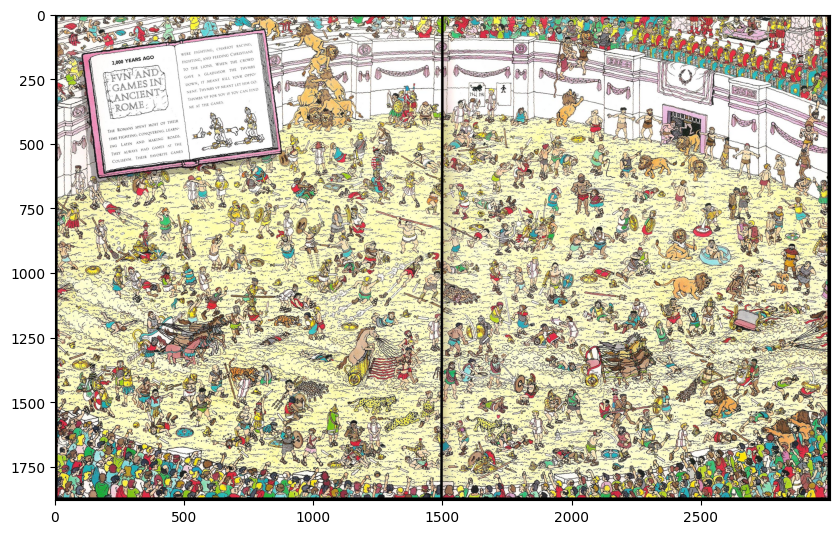

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

I = cv.imread('11.jpg')
I = cv.cvtColor(I, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(I)

In [3]:
y, x = 250, 750
half_h, half_w = 100, 200

def pick_patch(I, y, x, half_h, half_w):
    return I[y-half_h:y+half_h+1, x-half_w:x+half_w+1, :]

for yi in range(3):
    for xi in range(1):
        x_ = x + 30 * xi
        y_ = y + 30 * yi
        patch = pick_patch(I, y_, x_, half_h, half_w)
        

In [4]:
template = cv.imread('12.png')
template = cv.cvtColor(template, cv.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(template)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [5]:
template = template.flatten()
patch = pick_patch(I, 300, 400, 15, 15).flatten()
print('Template size = {}'.format(template.shape[0]))
print('Patch size = {}'.format(patch.shape[0]))

AttributeError: 'NoneType' object has no attribute 'flatten'

In [6]:
def highlight(R, T, I, use_max=True):
    W, H = I.shape[0], I.shape[1]
    w, h = T.shape[0], T.shape[1]
    wr, hg = R.shape[0], R.shape[1]

        
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(R)
    loc = max_loc if use_max else min_loc
    loc = loc + np.array([h//2, w//2])               # Size of R is different from I 
    tl = loc - np.array([h//2, w//2])
    br = loc + np.array([h//2, w//2])
    I_ = np.copy(I)
    c = (1.0, 0, 0) if I_.dtype == 'float32' else (255, 0, 0)
#
    cv.rectangle(I_, tuple(tl), tuple(br), c, 4)
    return I_

# Image
img_waldo = cv.imread('11.jpg')
img_waldo = cv.cvtColor(img_waldo, cv.COLOR_BGR2RGB)
img_waldo_zoomed = img_waldo[344:824, 1100:1440, :]
img = cv.cvtColor(img_waldo_zoomed, cv.COLOR_RGB2GRAY)


# Template
waldo = img_waldo_zoomed[167:264,123:179,:]
template = cv.cvtColor(waldo, cv.COLOR_RGB2GRAY)
foo = np.ones(img_waldo_zoomed.shape, dtype=img_waldo_zoomed.dtype)*255
foo[0:waldo.shape[0],0:waldo.shape[1],:] = waldo



In [7]:
T = template.copy()
I = img.copy()

method = 'cv2.TM_SQDIFF'
R = cv.matchTemplate(I, T, eval(method))
I_ = highlight(R, T, img_waldo_zoomed, use_max=False)

plt.figure(figsize=(10,6))
# plt.subplot(121)
# plt.title('Response $R(i,j)$')
# plt.imshow(R, cmap = 'gray')
# plt.subplot(122)
plt.imshow(I_)
# plt.suptitle(method)
plt.show();

NameError: name 'cv2' is not defined